In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load data
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

# Drop Person ID as it's not useful for prediction
df = df.drop("Person ID", axis=1)

# Encode categorical features
label_encoders = {}
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8933333333333333
Confusion Matrix:
 [[13  2  1]
 [ 3 12  1]
 [ 1  0 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.86      0.75      0.80        16
           2       0.95      0.98      0.97        43

    accuracy                           0.89        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.89      0.89        75



🔍 Accuracy: 0.9066666666666666

📊 Confusion Matrix:
 [[13  2  0]
 [ 2 13  1]
 [ 1  1 42]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.81      0.81      0.81        16
           2       0.98      0.95      0.97        44

    accuracy                           0.91        75
   macro avg       0.87      0.88      0.87        75
weighted avg       0.91      0.91      0.91        75



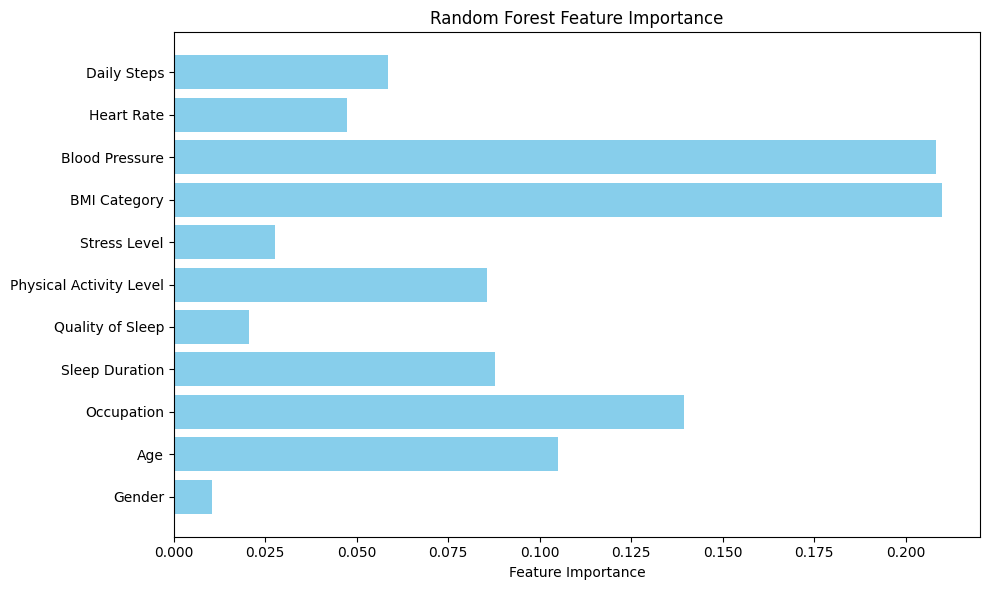

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Step 1: Load Dataset
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")  # Replace with actual filename

# Step 2: Drop unnecessary columns
df = df.drop("Person ID", axis=1)

# Step 3: Encode Categorical Variables
label_encoders = {}
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 4: Define Features and Target
X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Train Random Forest with Tuned Parameters
rf_clf = RandomForestClassifier(
    n_estimators=200,       # More trees
    max_depth=10,           # Limit depth to reduce overfitting
    min_samples_split=5,    # Minimum samples to split a node
    min_samples_leaf=2,     # Minimum samples at a leaf node
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Step 7: Predictions
y_pred = rf_clf.predict(X_test)

# Step 8: Evaluation
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Plot Feature Importance
importances = rf_clf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:57:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🎯 XGBoost Accuracy: 0.9333333333333333

📊 Confusion Matrix:
 [[14  1  0]
 [ 1 14  1]
 [ 1  1 42]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.88      0.88      0.88        16
           2       0.98      0.95      0.97        44

    accuracy                           0.93        75
   macro avg       0.91      0.92      0.91        75
weighted avg       0.93      0.93      0.93        75



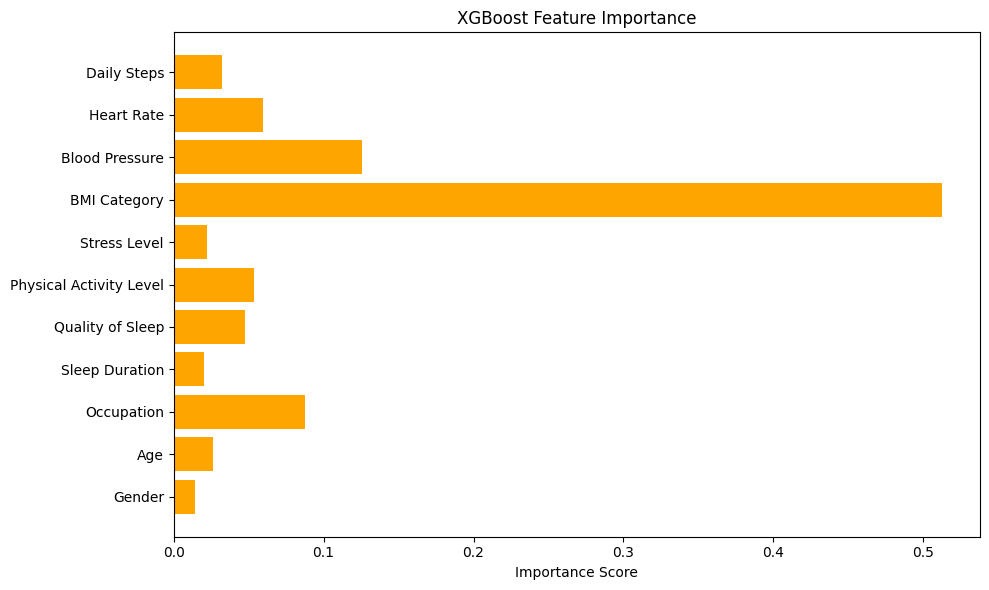

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")  # Replace with actual filename

# Step 2: Drop ID column if present
df = df.drop("Person ID", axis=1)

# Step 3: Encode categorical columns
label_encoders = {}
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 4: Split features and target
X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Step 6: Train XGBoost model
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Step 7: Prediction and Evaluation
y_pred = xgb_model.predict(X_test)

print("🎯 XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Feature Importance Plot
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb_model.feature_importances_, color='orange')
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
